<a href="https://colab.research.google.com/github/only2307/Covid19_Scraping_and_Visualize_in_Python/blob/main/Duy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pwd

/content


In [4]:
df =pd.read_csv("/content/gdrive/My Drive/Dataset/DataVisualization/covid_data_04_30_22.csv")
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,World,"512,954,708","+150,094","6,259,436",427.0,"466,821,638","+167,011","39,873,634","41,358","65,807",803.0,NaN,NaN,NaN
1,USA,"83,037,059",NaN,"1,020,660",NaN,"80,655,685",NaN,"1,360,714","1,562","248,214","3,051","1,005,251,244","3,004,892","334,538,223"
2,India,"43,075,864",NaN,"523,803",NaN,"42,533,377",NaN,"18,684",698,"30,665",373,"837,442,023","596,164","1,404,717,429"
3,Brazil,"30,433,042",NaN,"663,484",NaN,"29,507,557",NaN,"262,001","8,318","141,344","3,082","63,776,166","296,204","215,311,673"
4,France,"28,595,803",NaN,"145,869",NaN,"26,693,852",NaN,"1,756,082","1,677","436,333","2,226","266,484,045","4,066,187","65,536,600"


# Preprocessing data

In [5]:
#kiểm tra kiểu dữ liệu trong từng cột
df.dtypes

Country,Other        object
TotalCases           object
NewCases             object
TotalDeaths          object
NewDeaths           float64
TotalRecovered       object
NewRecovered         object
ActiveCases          object
Serious,Critical     object
TotCases/1M pop      object
Deaths/1M pop        object
TotalTests           object
Tests/1M pop         object
Population           object
dtype: object

Ta thấy ngoài trừ cột `Country,Other` biểu thị tên quốc gia có kiểu là `str` thì các cột có kiểu `object` khác nên được chuyển về numeric để có thể trực quan hóa. Hàm `change_data_type` nhận vào 1 dataframe cần chuyển đổi kiểu dữ liệu. Ta sẽ chuyển các cột `object` vừa nêu thành kiểu `float`.   
Ta tiến hành loại bỏ ký tự `+` (nếu có) và `,` trong các ô, sử dụng hàm `replace` của kiểu `str` (cần chuyển về kiểu `str` trước khi sử dụng `replace`) và `astype` của pandas để sửa lỗi và chuyển kiểu dữ liệu của giá trị đó.

In [6]:
def change_data_type(df):
    new_cols = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'NewCases',  'NewRecovered', 'ActiveCases', 	'Serious,Critical',
                'TotCases/1M pop', 'Deaths/1M pop', 'TotalTests',	'Tests/1M pop', 'Population']
    for col in new_cols:
      df[col] = df[col].str.replace('+', '')
      df[col] = df[col].str.replace(',', '')
      df[col] = df[col].astype(float)
    return df
change_data_type(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,World,512954708.0,150094.0,6259436.0,427.0,466821638.0,167011.0,39873634.0,41358.0,65807.0,803.0,NaN,NaN,NaN
1,USA,83037059.0,NaN,1020660.0,NaN,80655685.0,NaN,1360714.0,1562.0,248214.0,3051.0,1.005251e+09,3004892.0,3.345382e+08
2,India,43075864.0,NaN,523803.0,NaN,42533377.0,NaN,18684.0,698.0,30665.0,373.0,8.374420e+08,596164.0,1.404717e+09
3,Brazil,30433042.0,NaN,663484.0,NaN,29507557.0,NaN,262001.0,8318.0,141344.0,3082.0,6.377617e+07,296204.0,2.153117e+08
4,France,28595803.0,NaN,145869.0,NaN,26693852.0,NaN,1756082.0,1677.0,436333.0,2226.0,2.664840e+08,4066187.0,6.553660e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Niue,9.0,NaN,NaN,NaN,7.0,NaN,2.0,NaN,5468.0,NaN,NaN,NaN,1.646000e+03
225,Nauru,5.0,1.0,NaN,NaN,3.0,NaN,2.0,NaN,457.0,NaN,NaN,NaN,1.094800e+04
226,Micronesia,3.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,26.0,NaN,NaN,NaN,1.172190e+05
227,Saint Helena,2.0,NaN,NaN,NaN,2.0,NaN,0.0,NaN,327.0,NaN,NaN,NaN,6.110000e+03


Ta kiểm tra lại 1 lần nữa thì thấy các cột đã có kiểu dữ liệu phù hợp.

In [7]:
df.dtypes

Country,Other        object
TotalCases          float64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
TotCases/1M pop     float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
Population          float64
dtype: object

# Khám phá dữ liệu
Kiểm tra số dòng số cột của dữ liệu

In [8]:
df.shape

(229, 14)

Ta xem mỗi cột dữ liệu có bao nhiêu dòng có giá trị thiếu (hay là giá trị `NaN`)

In [9]:
df.isnull().sum()

Country,Other         0
TotalCases            0
NewCases            207
TotalDeaths           8
NewDeaths           216
TotalRecovered       15
NewRecovered        211
ActiveCases          15
Serious,Critical     77
TotCases/1M pop       2
Deaths/1M pop        10
TotalTests           17
Tests/1M pop         17
Population            3
dtype: int64

Ta thấy các cột `NewCases`, `NewDeaths`, `NewRecovered` gần như bị thiếu giá trị ở tất cả các dòng (`207`, `216`, `211` so với `229` dòng của bộ dữ liệu). Có thể lý giải đơn giản là do hầu hết quốc gia đã từ bỏ cập nhật các thông số này hằng ngày mà cập nhật trực tiếp luôn vào các cột Total tương ứng (`TotalCases`, `TotalDeaths`, `TotalRecovered`).  
Để tiện cho việc trực quan hóa sau này, ta sẽ tiến hành drop các cột `NewCases`, `NewDeaths`, `NewRecovered` 


In [10]:
new_df = df.drop(columns=['NewCases', 'NewDeaths', 'NewRecovered'], axis='columns')
new_df.isnull().sum()

Country,Other        0
TotalCases           0
TotalDeaths          8
TotalRecovered      15
ActiveCases         15
Serious,Critical    77
TotCases/1M pop      2
Deaths/1M pop       10
TotalTests          17
Tests/1M pop        17
Population           3
dtype: int64

# Trực quan hóa

Tìm kiếm mối quan hệ từ nhóm 10 quốc gia có dân số nhiều nhất thế giớì

In [11]:
#trích dataframe mới chứa dữ liệu của 10 quốc gia có dân số nhiều nhất
top10_population_df = new_df.sort_values(by=['Population'], ascending=False, ignore_index=True).iloc[:10, :]
top10_population_df

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,China,215667.0,5022.0,184078.0,26567.0,458.0,150.0,3.0,1.600000e+08,111163.0,1.439324e+09
1,India,43075864.0,523803.0,42533377.0,18684.0,698.0,30665.0,373.0,8.374420e+08,596164.0,1.404717e+09
2,USA,83037059.0,1020660.0,80655685.0,1360714.0,1562.0,248214.0,3051.0,1.005251e+09,3004892.0,3.345382e+08
3,Indonesia,6046467.0,156240.0,5882062.0,8165.0,2771.0,21688.0,560.0,9.549578e+07,342534.0,2.787918e+08
4,Pakistan,1528412.0,30371.0,1494141.0,3900.0,131.0,6683.0,133.0,2.815648e+07,123114.0,2.287027e+08
5,Nigeria,255716.0,3143.0,249896.0,2677.0,11.0,1187.0,15.0,5.075820e+06,23560.0,2.154414e+08
6,Brazil,30433042.0,663484.0,29507557.0,262001.0,8318.0,141344.0,3082.0,6.377617e+07,296204.0,2.153117e+08
7,Bangladesh,1952674.0,29127.0,1895146.0,28401.0,1297.0,11645.0,174.0,1.398753e+07,83419.0,1.676780e+08
8,Russia,18174991.0,375727.0,17528963.0,270301.0,2300.0,124445.0,2573.0,2.734000e+08,1871982.0,1.460484e+08
9,Mexico,5738769.0,324294.0,5038150.0,376325.0,4798.0,43674.0,2468.0,1.580168e+07,120256.0,1.314001e+08


DataFrame không chứa giá trị `NaN` cũng như các giá trị khác nên ta có thể thực hiện tiếp.

### Vẽ biểu đồ thể hiện TotalCases, TotalRecovered, TotalDeaths, TotalTests.

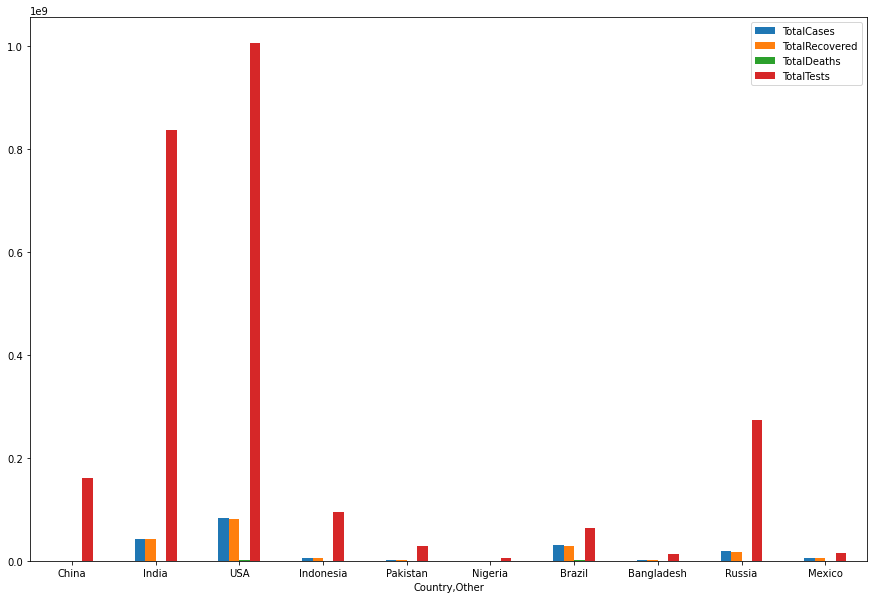

In [12]:
dfs = top10_population_df[['Country,Other', 'TotalCases', 'TotalRecovered', 'TotalDeaths', 'TotalTests']]
dfs = dfs.set_index('Country,Other')
ax = dfs.plot.bar(rot = 0, width = 0.5, figsize = (15,10));

Ta có thể thấy 1 sự tương quan tỷ lệ thuận với nhau giữa `TotalCases`, `TotalRecovered`, `TotalDeaths` và `TotalTests`. Tức là, số lượng thực hiện xét nghiệm càng nhiều sẽ số lượng ca nhiễm phát hiện được cũng gia tăng, dẫn đến nguy cơ có nhiều ca tử vong cũng như ca phục hồi ghi nhận.  
Tốc độ phục hồi dịch bệnh của các nước đều rất tốt (`TotalRecovered` xấp xỉ gần bằng `TotalCases`).  
Số ca tử vong (`TotalDeaths`) khá thấp nếu so sánh với `TotalCases`, `TotalRecovered`

### Tỷ lệ Serious,Critical so với ActiveCases.

In [13]:
#Iterate over all dates and find the serious cases and active cases
iterable1 = (top10_population_df.loc[i, 'Serious,Critical'] for i in range(10))
iterable2 = (top10_population_df.loc[i, 'ActiveCases'] for i in range(10))

top10_total_serious = np.fromiter(iterable1, dtype = float)
top10_total_activecases = np.fromiter(iterable2, dtype = float)

proportion = [np.sum(top10_total_serious), np.sum(top10_total_activecases)]

In [14]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.* np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

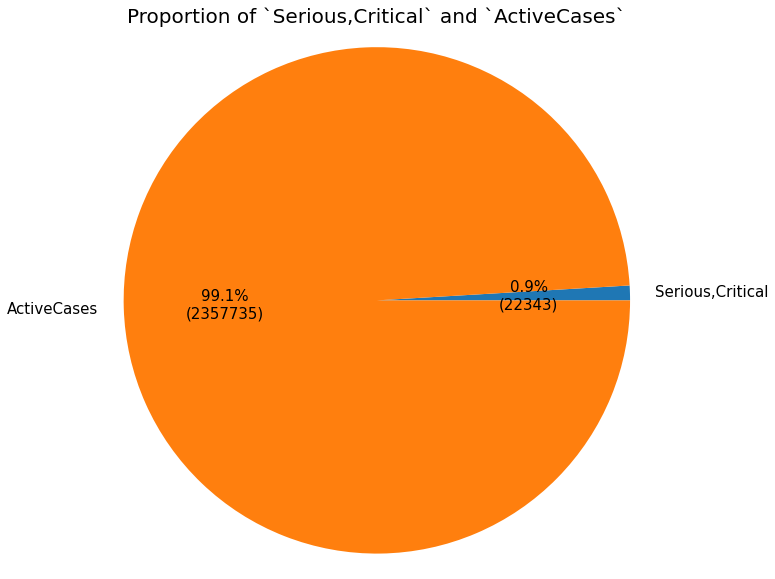

In [15]:
#Plot pie chart to show the proportion between total deaths and total recovered
fig, ax = plt.subplots(figsize = (10,10)) 
ax.pie(proportion,
       labels = ['Serious,Critical', 'ActiveCases'],
       autopct = lambda pct: func(pct, proportion),
       textprops = {'fontsize': 15})
ax.axis('equal')
ax.set_title('Proportion of `Serious,Critical` and `ActiveCases`', size = 20)
plt.show() 

Có thể thấy rằng tỷ lệ các ca bệnh nặng (`Serious,Critical`) chỉ chiếm tỷ lệ khá nhỏ (`0.9%` trong tổng số ca hiện tại). Có thể do biến thể mới có sức lây lan trong cộng đồng mạnh hơn nhưng độc lực đã giảm đi cộng với việc vaccine đã được phủ rộng rãi khiến tỷ lệ chuyển nặng giảm đi rất nhiều.

### Vẽ biểu đồ thể hiện TotCases/1M, Deaths/1M, Tests/1M.

In [16]:
# Vẽ biểu đồ thể hiện TotCases/1M, Deaths/1M, Tests/1M.
def plot_bar(country, col, set_title):
  # Figure Size
  fig, ax = plt.subplots(figsize = (16, 9))
  
  # Horizontal Bar Plot
  ax.barh(country, col)
  
  # Remove axes splines
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)
  
  # Remove x, y Ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  
  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 10)
  
  # Add x, y gridlines
  ax.grid(b = True, color = 'grey',
          linestyle = '-.', linewidth = 0.5,
          alpha = 0.2)
  
  # Show top values
  ax.invert_yaxis()
  
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
              str(round((i.get_width()), 2)),
              fontsize = 10, fontweight = 'bold',
              color = 'grey')
  
  # Add Plot Title
  ax.set_title(set_title, loc = 'left')
  
  # Add Text watermark
  fig.text(0.9, 0.15, "", fontsize = 12,
          color = 'grey', ha = 'right', va = 'bottom',
          alpha = 0.7)
  
  # Show Plot
  plt.show()

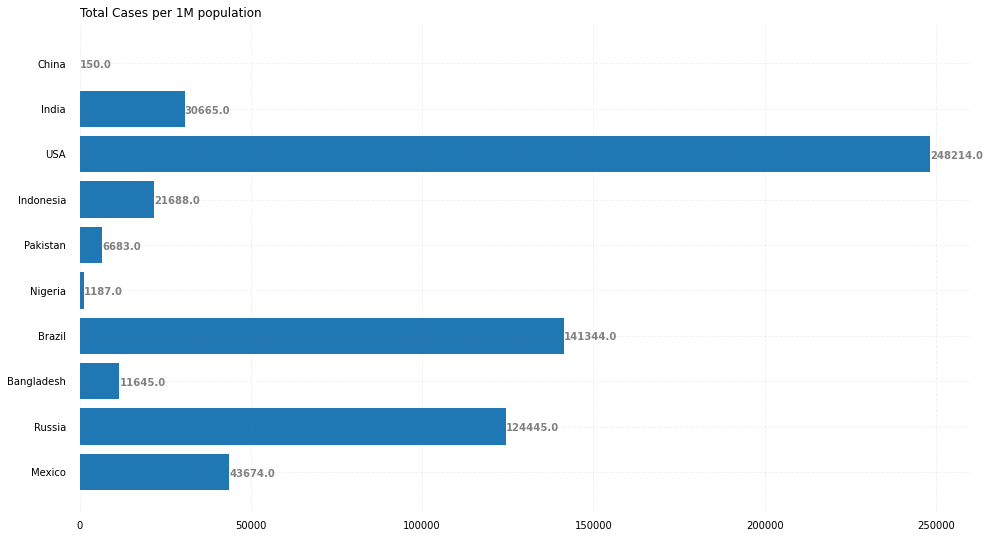

In [17]:
country = list(top10_population_df['Country,Other'])
totcases_1M = list(top10_population_df['TotCases/1M pop'])
plot_bar(country, totcases_1M, 'Total Cases per 1M population')

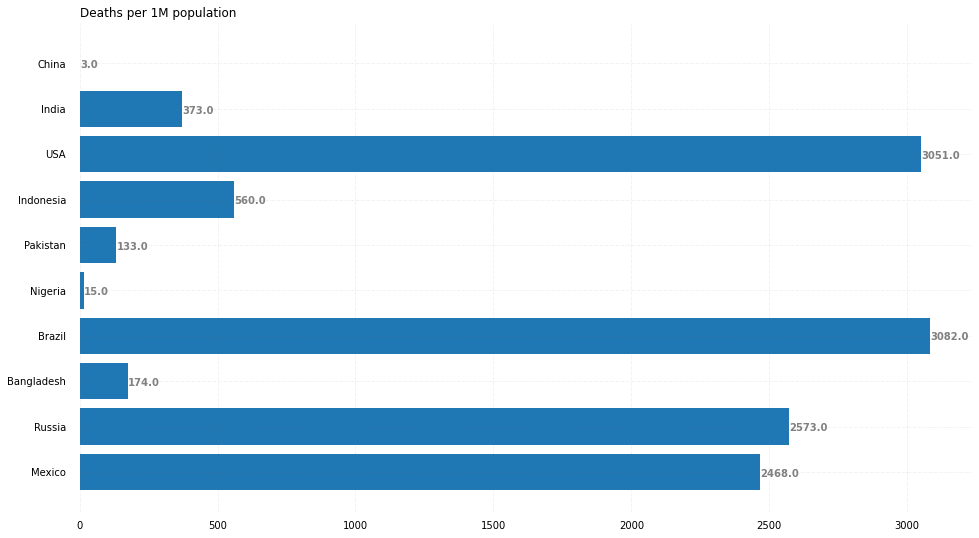

In [18]:
deathcases_1M = list(top10_population_df['Deaths/1M pop'])
plot_bar(country, deathcases_1M, 'Deaths per 1M population')

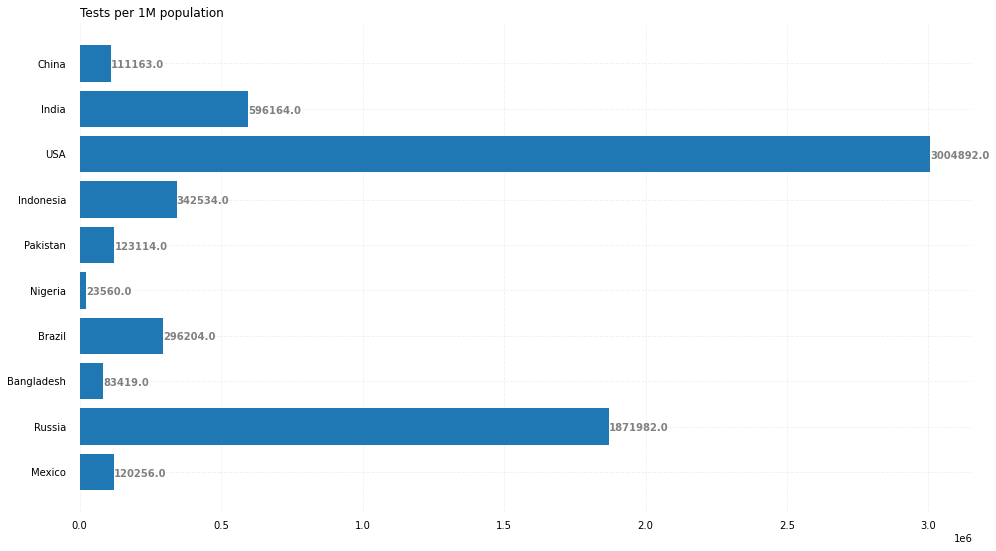

In [19]:
test_1M = list(top10_population_df['Tests/1M pop'])
plot_bar(country, test_1M, 'Tests per 1M population')

Bây giờ ta sẽ xem có liên quan gì giữa `TotCases/1M pop` và `Tests/1M pop` hay không bằng cách biểu diễn chúng trên cùng 1 biểu đồ.

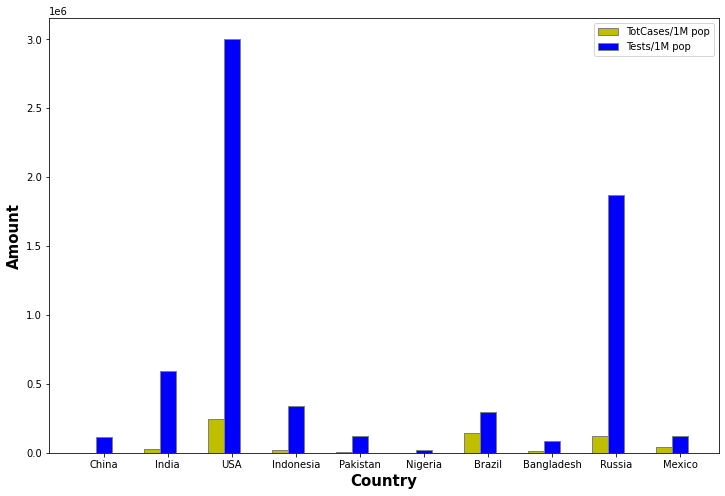

In [20]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
# Set position of bar on X axis
br1 = np.arange(len(totcases_1M))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totcases_1M, color = 'y', width = barWidth,
        edgecolor = 'grey', label ='TotCases/1M pop')
plt.bar(br2, test_1M, color = 'b', width = barWidth,
        edgecolor = 'grey', label = 'Tests/1M pop')
 
# Adding Xticks
plt.xlabel('Country', fontweight = 'bold', fontsize = 15)
plt.ylabel('Amount', fontweight = 'bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totcases_1M))], country)
 
plt.legend()
plt.show()

Từ các biểu đồ trên ta thấy Mỹ và Nga là 2 quốc gia tiến hành nhiều xét nghiệm nhất nếu tính theo tỷ lệ trên 1 triệu dân. Tuy nhiên ở 1 số quốc gia có tỷ lệ này ở mức thấp, tổng số ca nhiễm và tử vong lại chiếm tỷ trọng khá cao (như Mexico, Brazil). Cho nên 2 trường `TotCases/1M pop` vaf `Tests/1M pop` chưa thể hiện mối liên quan nào rõ ràng.

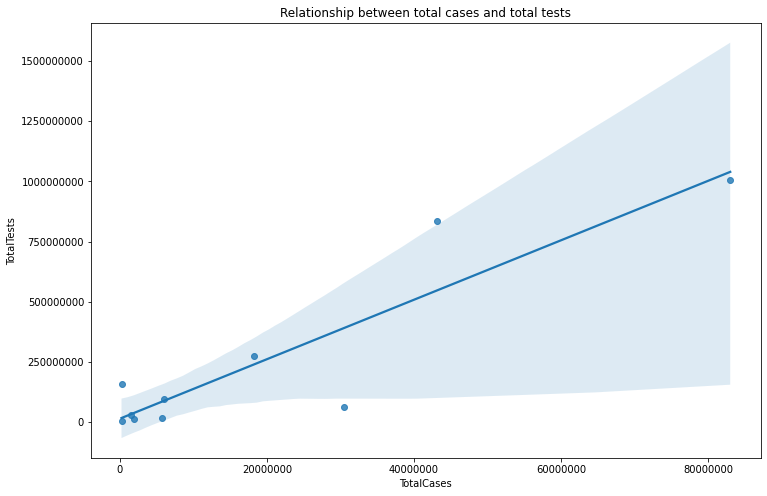

In [21]:
# Liệu có quan hệ nhân quả giữa hai trường TotalCases và TotalTests không? 
plt.figure(figsize = (12,8))
sns.regplot(data = top10_population_df, x = 'TotalCases', y = 'TotalTests')
plt.ticklabel_format(style = 'plain')
plt.title('Relationship between total cases and total tests')
plt.show()

Ta thấy có một mối quan hệ tuyến tính giữa 2 cột này nên có thể đặt ra giải thuyết có mối liên hệ nhân quả giữa chúng (tức là số ca nhiễm một quốc gia ghi nhận nhiều hơn do quốc gia đó đã tiến hành nhiều xét nghiệm chẩn đoán)

### So sánh tỷ lệ giữa TotalCases và TotalTests

In [22]:
#Iterate over all dates and find the serious cases and active cases
iter1 = (top10_population_df.loc[i, 'TotalCases'] for i in range(10))
iter2 = (top10_population_df.loc[i, 'TotalTests'] for i in range(10))

top10_total_cases = np.fromiter(iter1, dtype = float)
top10_total_tests = np.fromiter(iter2, dtype = float)

proportion = [np.sum(top10_total_cases), np.sum(top10_total_tests)]

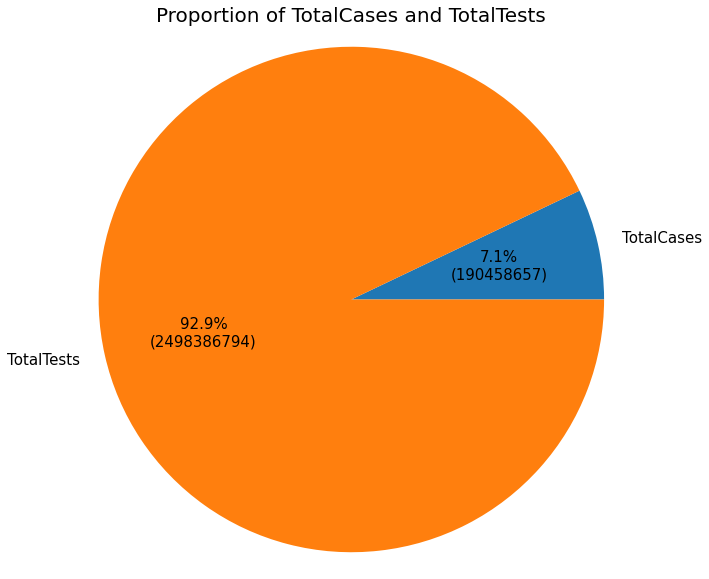

In [23]:
#Plot pie chart to show the proportion between total deaths and total recovered
fig,ax = plt.subplots(figsize = (10,10)) 
ax.pie(proportion,
       labels = ['TotalCases', 'TotalTests'],
       autopct = lambda pct: func(pct, proportion),
       textprops = {'fontsize':15})
ax.axis('equal')
ax.set_title('Proportion of TotalCases and TotalTests', size=20)
plt.show() 

Như vậy ta có thể kết luận được:  
- Số lượng test có mối tương quan với số lượng ca nhiễm.  
- Tỷ lệ tổng số ca nhiễm trên tổng số xét nghiệm là khoảng `7.1%`, tức là cứ 100 xét nghiệm thì phát hiện được khoảng 7 ca bệnh. Điều này cần được đánh giá đúng hơn qua việc xác định xem xét nghiệm thực hiện là xét nghiệm nhanh hay xét nghiệm sinh học phân tử (PCR), vì độ nhạy của các xét nghiệm này là khác nhau.